In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, PrecisionRecallDisplay, auc
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [19]:
# load dataset 
fraud_data  = pd.read_csv('data.csv')
# convert the binary column to 1 and 0
fraud_data['Fraud'] = fraud_data['Fraud'].map({'Yes': 1, 'No': 0})
# define features and target
X = fraud_data.loc[:, fraud_data.columns != 'Fraud']
y = fraud_data['Fraud']

In [20]:
# split the dataset into training and test sets as requested
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
# initialize two Decision Tree Classifier
decision_tree_no_limit = DecisionTreeClassifier(random_state=1)  # no limit
decision_tree_limited = DecisionTreeClassifier(max_depth=1, random_state=1)  # limit max depth

In [22]:
# train the two models
decision_tree_no_limit.fit(X_train, y_train)
decision_tree_limited.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=1)

In [23]:
# make predictions
prediction_no_limit = decision_tree_no_limit.predict(X_test)
prediction_limited = decision_tree_limited.predict(X_test)

In [24]:
# calculate metrics for both models
print("\nMetrics:")
print("\nPrediction Without Limit:")
print("\nAccuracy:", accuracy_score(y_test, prediction_no_limit))
print("Precision:", precision_score(y_test, prediction_no_limit))
print("Recall", recall_score(y_test, prediction_no_limit))
print("\nPrediction Max Depth = 1:")
print("\nAccuracy:", accuracy_score(y_test, prediction_limited))
print("Precision:", precision_score(y_test, prediction_limited))
print("Recall", recall_score(y_test, prediction_limited))


Metrics:

Prediction Without Limit:

Accuracy: 0.995
Precision: 1.0
Recall 0.8571428571428571

Prediction Max Depth = 1:

Accuracy: 0.965
Precision: 0.0
Recall 0.0


In [25]:
# generate classification reports and confusion matrices
report_no_limit = classification_report(y_test, prediction_no_limit, output_dict=True)
report_limited = classification_report(y_test, prediction_limited, output_dict=True)

In [26]:
# convert the report to dataframe
classification_report_no_limit_df = pd.DataFrame(report_no_limit).transpose()
classification_report_limited_df = pd.DataFrame(report_limited).transpose()

In [27]:
# display results
print(classification_report_no_limit_df)
print(classification_report_limited_df)

              precision    recall  f1-score  support
0              0.994845  1.000000  0.997416  193.000
1              1.000000  0.857143  0.923077    7.000
accuracy       0.995000  0.995000  0.995000    0.995
macro avg      0.997423  0.928571  0.960246  200.000
weighted avg   0.995026  0.995000  0.994814  200.000
              precision  recall  f1-score  support
0              0.965000   1.000  0.982188  193.000
1              0.000000   0.000  0.000000    7.000
accuracy       0.965000   0.965  0.965000    0.965
macro avg      0.482500   0.500  0.491094  200.000
weighted avg   0.931225   0.965  0.947812  200.000


In [28]:
confusion_matrix_no_limit = confusion_matrix(y_test, prediction_no_limit)
confusion_matrix_limited = confusion_matrix(y_test, prediction_limited)

In [29]:
print(confusion_matrix_no_limit)
print(confusion_matrix_limited)

[[193   0]
 [  1   6]]
[[193   0]
 [  7   0]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


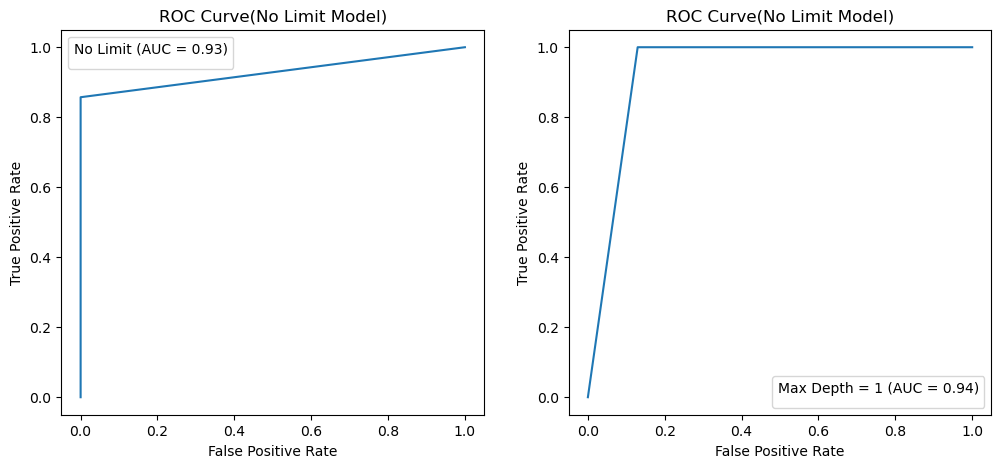

In [30]:
# calculate the ROC curve values for the no limit model
false_positive_rate_no_limit, true_positive_rate_no_limit, thresholds_no_limit = roc_curve(y_test, decision_tree_no_limit.predict_proba(X_test)[:, 1])
# calculate the AUC 
roc_auc_no_limit = auc(false_positive_rate_no_limit, true_positive_rate_no_limit) 

# calculate the ROC curve values for the model with max_depth = 1
false_positive_rate_limited, true_positive_rate_limited, thresholds_limited = roc_curve(y_test, decision_tree_limited.predict_proba(X_test)[:, 1])
# calculate the AUC 
roc_auc_limited = auc(false_positive_rate_limited, true_positive_rate_limited)  

# set the figures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# plot the ROC curve for the no limit model
ax1.plot(false_positive_rate_no_limit, true_positive_rate_no_limit)
ax1.set_title("ROC Curve(No Limit Model)")
ax1.legend(title = "No Limit (AUC = {:.2f})".format(roc_auc_no_limit))
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")


# plot the ROC curve for the model with max_depth = 1
ax2.plot(false_positive_rate_limited, true_positive_rate_limited)
ax2.set_title("ROC Curve(No Limit Model)")
ax2.legend(title = "Max Depth = 1 (AUC = {:.2f})".format(roc_auc_limited))
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")


# Show the plot
plt.show()


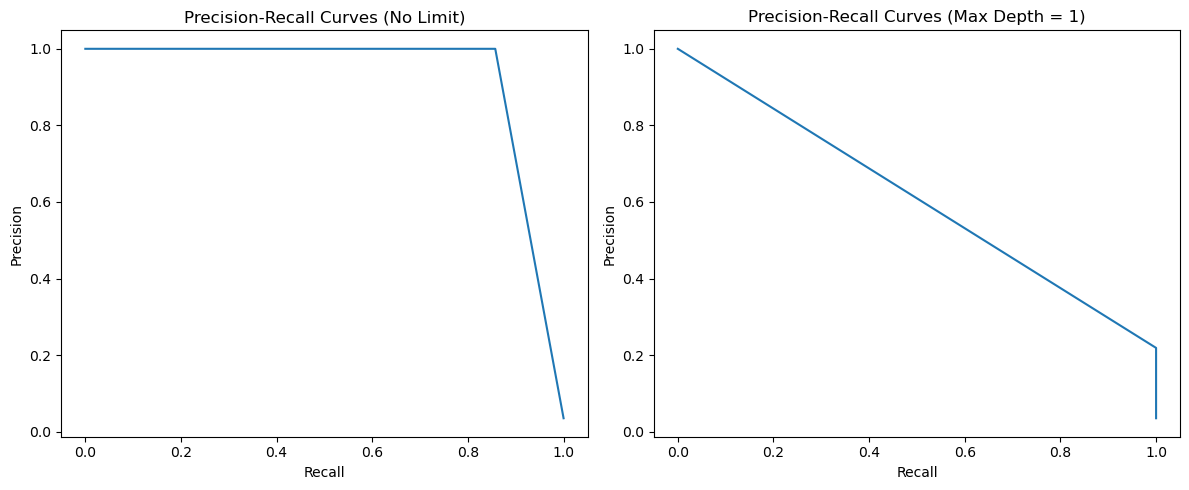

In [31]:
# Precision/Recall Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

precision_no_limit, recall_no_limit, _ = precision_recall_curve(y_test, decision_tree_no_limit.predict_proba(X_test)[:, 1])
precision_limited, recall_limited, _ = precision_recall_curve(y_test, decision_tree_limited.predict_proba(X_test)[:, 1])
ax1.plot(recall_no_limit, precision_no_limit, label="No Limit")
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title("Precision-Recall Curves (No Limit)")
ax2.plot(recall_limited, precision_limited, label="Max Depth = 1")
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title("Precision-Recall Curves (Max Depth = 1)")

plt.tight_layout()
plt.show()

For the model with no limitation, it performs well overall, with high accuracy, precision, and recall for both classes, especially Class 0. There is only one instance of a false negative.
For the model set max depth at 1, the model performs well on Class 0 but fails entirely to identify Class 1, resulting in zero precision, recall, and F1-score for that class. This indicates that the model is heavily biased toward predicting the negative class, possibly due to its limited depth. The model without the depth limitation is more effective for this dataset, achieving better recall for Class 1 and more balanced metrics across classes.